**Convert to Gray Scale**

### We convert to gray scale to increase the speed of or algorithum. Having a color image triples the amout of work needed by the processor

In [34]:
lane_image = np.copy(img)

In [35]:
gray = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)

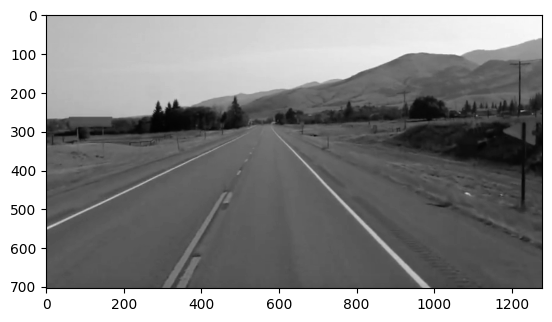

In [36]:
plt.imshow(gray, cmap='gray')

# Blurring 


Blurring refers to averaging the pixel values within a neighborhood. This is also called a low pass filter.
A low pass filter is a filter that allows low frequencies and blocks higher frequencies.
A simple way to build a low pass filter is by uniformly averaging the values in the neighborhood of a pixel.

We use what is called a Kernal to perform the blur


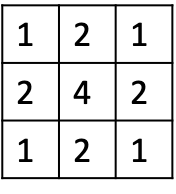

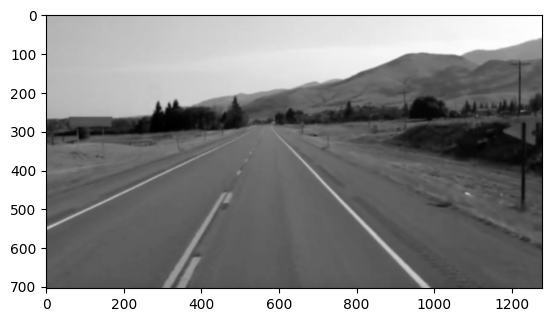

In [10]:
kernel_identity = np.array([[0,0,0], [0,1,0], [0,0,0]])
kernel_3x3 = np.ones((3,3), np.float32) / 9.0
kernel_5x5 = np.ones((5,5), np.float32) / 25.0

output = cv2.filter2D(img, -1, kernel_identity)
cv2.imshow('Identity filter', output)

output = cv2.filter2D(img, -1, kernel_3x3)
cv2.imshow('3x3 filter', output)

output = cv2.filter2D(img, -1, kernel_5x5)
cv2.imshow('5x5 filter', output)

plt.imshow(output, cmap='gray')

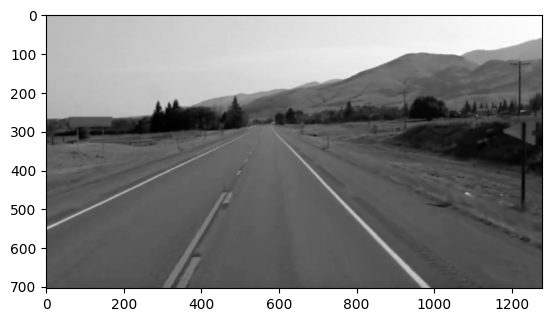

In [7]:
#to quickly make your own Kernal you can use the following CV code
blur = cv2.GaussianBlur(gray, (5,5),0) #the (5,5) is a kernal
plt.imshow(blur, cmap='gray')

# Edge Detection 
What is Edge Detection?
The easyest way to identify edge detection is to use Gradient which is the change in brightness over the change in pixes.

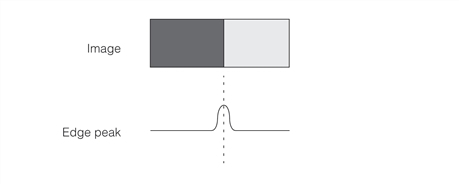

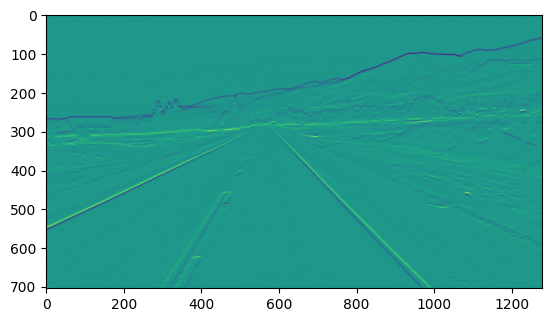

In [14]:
#DO NOT RUN HERE
# Pure edge Detection

import cv2
import numpy as np

img = cv2.imread('test_image.jpg', cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape

sobel_horizontal = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_vertical = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
                                                                                                                                                                                                                                                            
cv2.imshow('Original', img)
cv2.imshow('Sobel horizontal', sobel_horizontal)
cv2.imshow('Sobel vertical', sobel_vertical)
#plt.imshow(img,cmap='gray')
#plt.imshow(sobel_horizontal)
plt.imshow(sobel_vertical)

As a reminder Edge detection looks at the pixes and searches for a sharp change and that is why we change to gray scale

### Strong Gradient
```python
[
[0 0 255 255]
[0 0 255 255]
[0 0 255 255]
[0 0 255 255]]
```

### Small Gradient
```python
[
[0 0 20 20]
[0 0 20 20]
[0 0 20 20]
[0 0 20 20]]
```

One of the algorithis is called Canny method that will identify these changes. Canny will perform a Gaussian blur when it is run 

The Canny function will perform the derivative(f(x,y)) and mesure the adjacent changes in intensity in all directions, x and y. By comuting the change in intensity it will compute the gradiants in all directions

cv2.Canny(image, low_threshold, high_threshold)

Areas where it's compleatly black correspond to low changes in intensity between adjacent pixels. Areas where the wite line is present it is a region in the image where there is a high change in intensity, exceedign the threshold. If the area falls between the threshold is only accepted if it is connected to a strong edge. Documentation recomends to use a ratio of 1:2 or 1:3


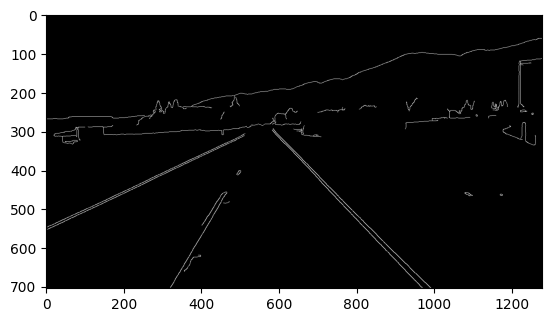

In [15]:
canny= cv2.Canny(blur, 50, 150)
plt.imshow(canny, cmap='gray')

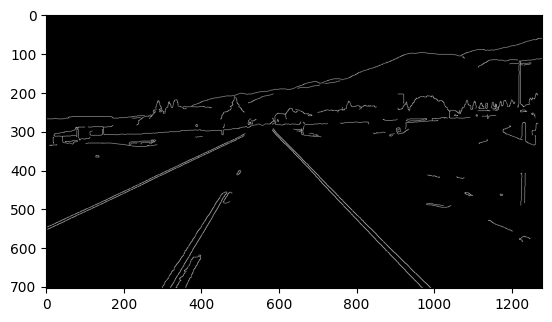

In [16]:
canny= cv2.Canny(blur, 50, 100)
plt.imshow(canny, cmap='gray')

## Detecting lane Lines by using masks

In [59]:
#creating a function for our Canny function
def canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5),0)
    canny= cv2.Canny(gray, 50, 200)
    
    return canny

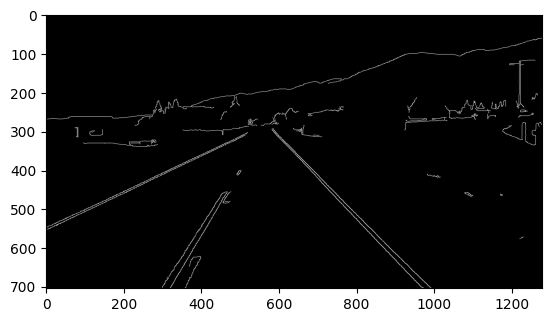

In [60]:
plt.imshow(canny(lane_image), cmap='gray')

In [61]:
def region(image):
    canny_image = canny(image)
    height = canny_image.shape[0]
    polygons = np.array([
        [(200,height),(1100,height),(550,250)]
        ]) # we need to have an array of polygons for fillPoly
    mask = np.zeros_like(canny_image) #creates an array the same pixle denity of image
    cv2.fillPoly(mask, polygons, 255)
    return mask

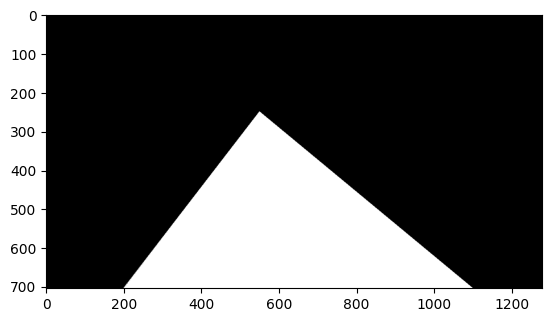

In [62]:
plt.imshow(region(lane_image), cmap='gray')

In [63]:
#apply the bitwize & opperations for the images to "apply" the mask
#Computing the bitwise & of both images takes the Homologous(same position) pixel in both arrays 

In [64]:
def cropped(image):
    canny_image = canny(image)
    mask = region(image)
    final_image = cv2.bitwise_and(mask, canny_image)
    return final_image

In [65]:
lane_image = np.copy(img)

cropped_image = cropped(lane_image)

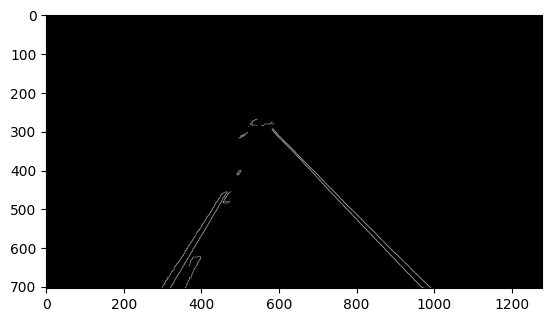

In [66]:
plt.imshow(cropped_image, cmap='gray')

# Hough Transform - Identifying stright lines




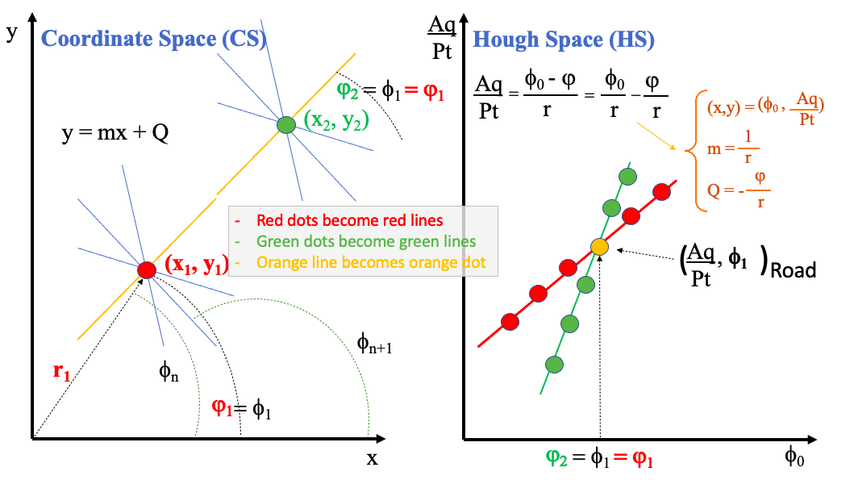

In [67]:
lines = cv2.HoughLinesP(cropped_image,1,np.pi/180,100,np.array([]),minLineLength = 40,maxLineGap=5) 
#cv2.HoughLinesP(image,Pixes size,radian value size,dencity of lines,blank array ,minLineLength,maxLineGap) 

In [68]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image,(x1,y1), (x2,y2), (255,0,0),10) #image, linea, lineb, blue, Line thickness
    return line_image

In [69]:
line_image = display_lines(lane_image, lines)

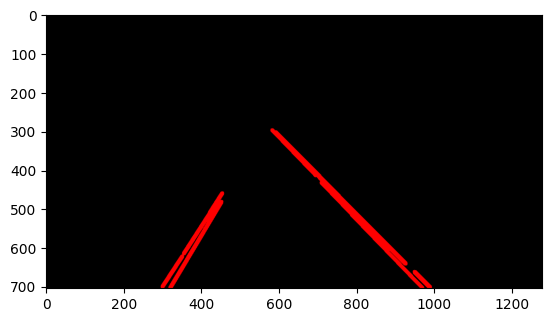

In [70]:
plt.imshow(line_image,)

In [71]:
mirged = cv2.addWeighted(line_image, 0.8, lane_image, 1, 1)

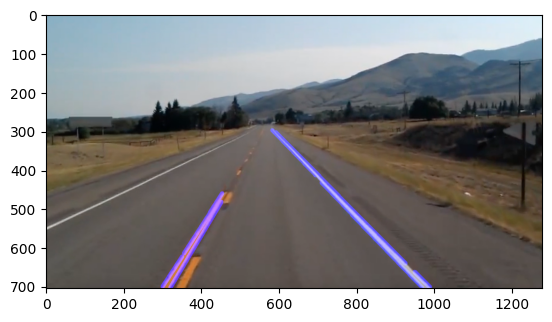

In [72]:
plt.imshow(cv2.cvtColor(mirged, cv2.COLOR_BGR2RGB))

In [73]:
import time
cap = cv2.VideoCapture("test2.mp4")

    

In [74]:
while(cap.isOpened()):
    _, frame = cap.read()
    cropped_image = cropped(frame)
    lines = cv2.HoughLinesP(cropped_image,.8,np.pi/180,100,np.array([]),minLineLength = 40,maxLineGap=5) 
#    averaged_lines = average_slope(frame, lines)
#    line_image = displayed_lines(frame,averaged_lines)
    line_image = display_lines(frame, lines)
    combo_image = cv2.addWeighted(frame, 0.8, line_image,1,1)
    #cv2.imshow("lines",combo_image)
    cv2.startWindowThread()
    cv2.imshow("result",combo_image)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break
cap.release()

    

2024-04-29 18:13:37.362 Python[91334:4352609] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'
